In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
import keras.backend as K
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

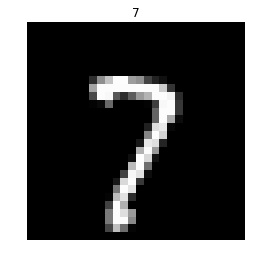

In [5]:
# Plot data
random_idx = np.random.choice(60000)
plt.imshow(X_train[random_idx], 'gray')
plt.title(y_train[random_idx])
plt.axis('off');

In [7]:
# Preprocesar imagenes
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5

# Agregamos un ultimo canal debido a la escala de grises
X_train = X_train[..., None]
X_test = X_test[..., None]

X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [8]:
y_train[0]

5

In [9]:
# One hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Usando una red convolucional

In [10]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [12]:
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 204us/step - loss: 1.8239 - acc: 0.5324 - val_loss: 0.9116 - val_acc: 0.7959
Epoch 2/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.5660 - acc: 0.8525 - val_loss: 0.3896 - val_acc: 0.8884
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3462 - acc: 0.9007 - val_loss: 0.2921 - val_acc: 0.9125
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2711 - acc: 0.9221 - val_loss: 0.2352 - val_acc: 0.9329
Epoch 5/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2255 - acc: 0.9353 - val_loss: 0.2008 - val_acc: 0.9440


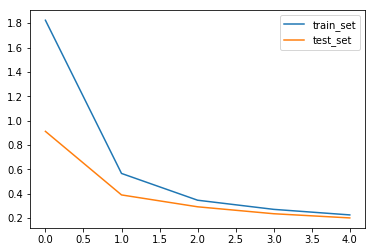

In [13]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

## Visualizando los filtros

In [20]:
kernels = model.layers[0].kernel
kernels

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 16) dtype=float32_ref>

In [21]:
kernels = K.eval(kernels)
kernels.shape

(3, 3, 1, 16)

In [22]:
kernels = kernels[:,:,0,:]
kernels.shape

(3, 3, 16)

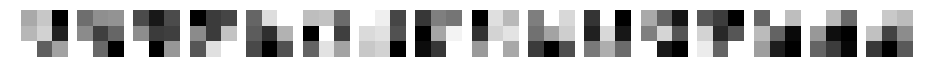

In [23]:
fig, axes = plt.subplots(1, kernels.shape[2], figsize=(16,4))

for i in range(kernels.shape[2]):
    axes[i].imshow(kernels[:,:,i], 'gray')
    axes[i].axis('off')

## Regularizacion

In [25]:
from keras.layers import BatchNormalization, Dropout

In [26]:
model = Sequential()

model.add(Dropout(0.1, input_shape=(28,28,1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

In [28]:
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.8193 - acc: 0.7609 - val_loss: 0.1927 - val_acc: 0.9435
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3559 - acc: 0.8919 - val_loss: 0.1462 - val_acc: 0.9549
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.2689 - acc: 0.9179 - val_loss: 0.1169 - val_acc: 0.9638
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2244 - acc: 0.9309 - val_loss: 0.1028 - val_acc: 0.9672
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1970 - acc: 0.9392 - val_loss: 0.0900 - val_acc: 0.9723


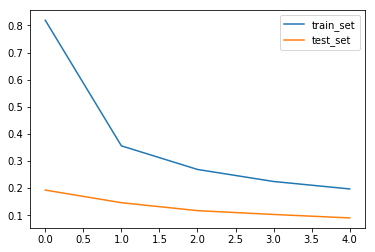

In [29]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

In [30]:
model.evaluate(X_train, y_train, batch_size=512)

60000/60000 [==============================] - 1s 12us/step


[0.10018288315931956, 0.9705166666984558]

In [31]:
model.evaluate(X_test, y_test, batch_size=512)

10000/10000 [==============================] - 0s 14us/step


[0.09003108191490174, 0.9723000005722046]

## MC Dropout

[Dropout as a Bayesian Approximation](https://arxiv.org/abs/1506.02142)

En los ensembles tipo bagging, las predicciones que hacemos son el promedio de todos los modelos entrenados. En el caso de dropout, al momento de entrenar, el modelo va a ver un conjunto diferente de features en cada batch (como si cada batch fuera un modelo distinto); y al momento de hacer predicciones, se usan todos los features (esto se interpretaria como el promedio de todos los modelos).

En el caso de ensembles, ademas del promedio, podemos sacar una desviacion estandar de las predicciones, para darnos una idea de la certeza de la prediccion. Para hacer algo parecido en el caso de dropout, tendriamos que tener un conjunto de resultados de cada modelo, para hacer esto vamos a necesitar usar dropout no solo al momento de entrenar, sino al momento de usar el modelo. Para forzar este comportamiento vamos a usar:
```
model.add(Lambda(lambda x: K.dropout(x, level=0.5)))
```
En lugar de:
```
model.add(Dropout(0.5))
```

In [32]:
from keras.layers import Lambda

In [33]:
model = Sequential()

model.add(Lambda(lambda x: K.dropout(x, level=0.1), input_shape=(28,28,1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Lambda(lambda x: K.dropout(x, level=0.1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', use_bias=False))
model.add(BatchNormalization())

model.add(MaxPool2D())
model.add(Flatten())
model.add(Lambda(lambda x: K.dropout(x, level=0.5)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        4608      
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 32)        128       
__________

In [37]:
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2059 - acc: 0.9362 - val_loss: 0.1726 - val_acc: 0.9485
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1832 - acc: 0.9434 - val_loss: 0.1627 - val_acc: 0.9496
Epoch 3/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1682 - acc: 0.9482 - val_loss: 0.1397 - val_acc: 0.9575
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1555 - acc: 0.9518 - val_loss: 0.1350 - val_acc: 0.9571
Epoch 5/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1455 - acc: 0.9547 - val_loss: 0.1289 - val_acc: 0.9612


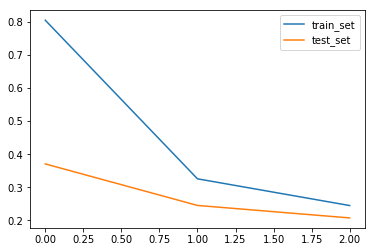

In [36]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

In [38]:
model.evaluate(X_train, y_train, batch_size=512)

60000/60000 [==============================] - 1s 13us/step


[0.14156455116271974, 0.9568833333651224]

In [40]:
model.evaluate(X_test, y_test, batch_size=512)

10000/10000 [==============================] - 0s 16us/step


[0.12452721424102783, 0.9594]

## Predicciones del modelo

In [57]:
# Vamos a examinar un caso del test set
i = 8
sample_x = X_test[i, None]

# Vemos el resultado esperado
np.argmax(y_test[i])

5

In [58]:
# Si ejecutamos varias veces esta linea, vamos a ver que se obtienen distintos resultados
model.predict(sample_x)

array([[1.8027364e-07, 6.7525097e-10, 4.8029829e-06, 5.0369590e-06,
        5.9277620e-05, 9.9922931e-01, 3.9430775e-04, 4.2196460e-09,
        1.3820472e-04, 1.6888476e-04]], dtype=float32)

In [59]:
# Para obtener un promedio y una desviacion estandar,
# vamos a hacer varias replicas de nuestro ejemplo
rep_sample_x = sample_x.repeat(1000, axis=0)
rep_sample_x.shape

(1000, 28, 28, 1)

In [60]:
preds = model.predict(rep_sample_x)
preds.shape

(1000, 10)

In [61]:
# Podemos ver el promedio de las predicciones
y_ = preds.mean(axis=0)
y_

array([1.8612511e-04, 1.3953029e-06, 5.8615801e-04, 1.8578397e-05,
       6.9541991e-04, 9.1521239e-01, 6.7912340e-02, 2.0651539e-06,
       1.1162261e-02, 4.2231823e-03], dtype=float32)

In [62]:
std = preds.std(axis=0)
std

array([1.1987014e-03, 8.2220085e-06, 3.5194904e-03, 1.0046158e-04,
       4.3293582e-03, 1.6059947e-01, 1.4541176e-01, 1.7608074e-05,
       4.0563613e-02, 2.1940589e-02], dtype=float32)

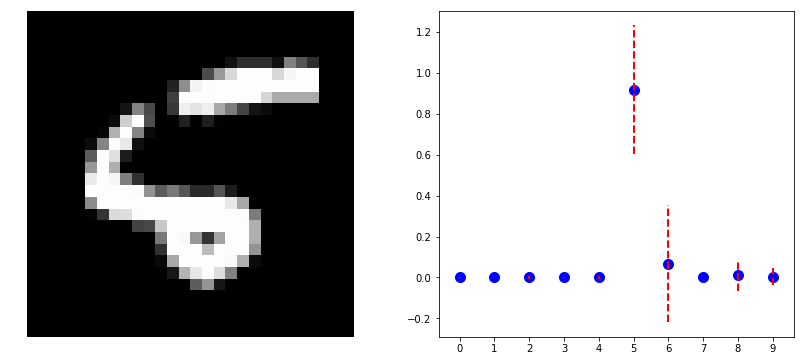

In [63]:
# Veamos la informacion en un plot
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
ax[0].axis('off')


# 1.96 = intervalo de confianza 95%
# 2.58 = intervalo de confianza 99%
conf = 1.96
std_lines = [(y - conf*std[i], y + conf*std[i]) for i,y in enumerate(y_)]

for i, (y1,y2) in enumerate(std_lines):
    ax[1].vlines(i, y1, y2, 'red', 'dashed', linewidth=2)
    
ax[1].scatter(range(10), y_, s=100, c='b')
ax[1].set_xticks(range(10))
plt.show()

La interpretación del gráfico es que para ese **caso de prueba** (dato i=8), existe un **95% de certeza** que el valor de la bola azul o **media de los intentos** oscile entre el rango de las lineas punteadas o **intervalo de confianza**.